# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import time
import seaborn as sns
# Import API key
from API_keys import Google_API_Key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [104]:
weather_data = pd.read_csv("../WeatherPy/output_data/cities.csv")
weather_data


,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ushuaia,75,AR,1603803259,77,-54.80,-68.30,5.00,10.30
1,1,mahebourg,40,MU,1603803272,61,-20.41,57.70,26.00,4.10
2,2,lima,75,PE,1603803493,87,-12.04,-77.03,17.22,3.10
3,3,yahotyn,0,UA,1603803544,62,50.28,31.76,15.00,5.00
4,4,kodiak,1,US,1603803213,56,57.79,-152.41,7.00,6.70
5,5,ahipara,21,NZ,1603803288,92,-35.17,173.17,14.67,1.04
6,6,constitucion,100,CL,1603803037,68,-35.33,-72.42,12.76,1.96
7,7,sitka,75,US,1603803293,81,57.05,-135.33,8.00,1.50
8,8,busselton,100,AU,1603803260,67,-33.65,115.33,18.33,4.28
9,9,cape town,0,ZA,1603803166,56,-33.93,18.42,21.11,8.20


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [105]:
gmaps.configure(api_key=Google_API_Key)
locations = weather_data[["Lat", "Lng"]]
humidity = weather_data["Humidity"]
fig = gmaps.figure (center=(50.0, -5.0), zoom_level=2)
max_intensity = np.max(humidity)
heat_layer = gmaps.heatmap_layer(locations, weights = humidity, dissipating=False, max_intensity = 100, point_radius=3)
fig.add_layer(heat_layer)
fig
max_intensity

97

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [106]:
new_types_df = pd.DataFrame(weather_data, columns = ["City", "Max Temp", "Wind Speed", "Cloudiness"])
print(new_types_df)
max_temp = (new_types_df["Max Temp"] > 20)
wind_speed = new_types_df["Wind Speed"] < 10
cloudiness = new_types_df["Cloudiness"] > 40
new_types_df[max_temp & wind_speed & cloudiness]


                     City  Max Temp  Wind Speed  Cloudiness
0                 ushuaia      5.00       10.30          75
1               mahebourg     26.00        4.10          40
2                    lima     17.22        3.10          75
3                 yahotyn     15.00        5.00           0
4                  kodiak      7.00        6.70           1
5                 ahipara     14.67        1.04          21
6            constitucion     12.76        1.96         100
7                   sitka      8.00        1.50          75
8               busselton     18.33        4.28         100
9               cape town     21.11        8.20           0
10               khatanga    -15.81        5.67         100
11                  kapaa     25.89        1.74         100
12                 castro     21.13        3.71          71
13             port keats     27.17        1.66          11
14            clyde river    -12.98        1.72          41
15                rikitea     23.90     

,City,Max Temp,Wind Speed,Cloudiness
11,kapaa,25.89,1.74,100
12,castro,21.13,3.71,71
15,rikitea,23.90,8.89,100
16,alofi,22.00,3.10,47
17,hilo,23.00,1.50,90
34,puerto escondido,25.79,1.64,100
35,emilio carranza,23.97,2.98,98
36,tual,28.36,4.37,59
37,butaritari,27.28,3.72,100
41,labuhan,27.85,1.58,100


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [107]:
hotel_df = pd.DataFrame(weather_data, columns=["City", "Country", "Lat", "Lng"])
hotel_df["Hotel Name"] = "  "
hotel_df

,City,Country,Lat,Lng,Hotel Name
0,ushuaia,AR,-54.80,-68.30,
1,mahebourg,MU,-20.41,57.70,
2,lima,PE,-12.04,-77.03,
3,yahotyn,UA,50.28,31.76,
4,kodiak,US,57.79,-152.41,
5,ahipara,NZ,-35.17,173.17,
6,constitucion,CL,-35.33,-72.42,
7,sitka,US,57.05,-135.33,
8,busselton,AU,-33.65,115.33,
9,cape town,ZA,-33.93,18.42,


In [108]:
target_coordinates = f"{hotel_df['Lat'][0]},{hotel_df['Lng'][0]}"
target_search = "hotel"
target_radius = 5000
target_type = "hotel"
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": Google_API_Key
}
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
response  = requests.get(base_url, params=params)
print(response.json())

{'html_attributions': [], 'next_page_token': 'AcnaJv2CSKRcwnG_BlvOcRJJRKomux3CK-ulf6tSZIXBcGeMrlyn3_ucVF1GEv4kkuTwJVu5lTBpDt7N_LB2lA4ivE6MUUTJdEcWm4ULZbhZsl6l3006o4e2FC7BrITpY_M1B9GsZSIrrNgjOuJiu4Pde_Dnh5HoRcWrCPskgD43Hh8ZsBLB1XZub_y2UoJna6NiFDJH0DXkUq3NX0gaLU-WjErOlarAVi6W-_JWvKbtLRD4QYGvgXKkB2LsOX6rnEO92rucP3tlImWhesk-jwDLsqnp3Bm2IzenK6pckI9VNwHpj9eTjNiHErswrYp4hMFe7peys5J5ib0UAkMzfVjQL91otKfuC2pBeeT4pMOa30IATjXIP7RxaX-s4A2yKgTfUnUK16O_FbKBlknja7-trvvBVSYkv7XnY7rPpVTygLJSNdv10jNq33RJtw', 'results': [{'business_status': 'OPERATIONAL', 'geometry': {'location': {'lat': -54.83788999999999, 'lng': -68.359933}, 'viewport': {'northeast': {'lat': -54.83655452010727, 'lng': -68.35858162010727}, 'southwest': {'lat': -54.83925417989271, 'lng': -68.36128127989272}}}, 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png', 'name': 'Hotel Los Yámanas', 'opening_hours': {'open_now': True}, 'photos': [{'height': 3311, 'html_attributions': ['<a href="https://maps.google.

In [109]:
hotel_df.iloc[0][0]

'ushuaia'

In [110]:
hotel_name = []
params = {
    "radius": 5000,
    "types": "hotel",
    "keyword": "hotel",
    "key": Google_API_Key   
}
for index, row in hotel_df.iterrows():
    lat=row["Lat"]
    lng=row["Lng"]
    params["location"] = f"{lat},{lng}"
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    name_address = requests.get(base_url, params=params)
    name_address = name_address.json()
    try:
        hotel_name.append(name_address['results'][0]['name'])
    except IndexError:
        hotel_name.append(np.nan)
    

In [111]:
hotel_name

['Hotel Los Yámanas',
 'Holiday Inn Mauritius Mon Tresor',
 'Gran Hotel Bolivar Lima',
 'Резиденція',
 'Best Western Kodiak Inn and Convention Center',
 'Ahipara Bay Motel',
 'Reserva los Bollenes',
 'Westmark Sitka',
 'Abbey Beach Resort',
 'Atlanticview Cape Town Boutique Hotel',
 'Gostinitsa "Zapolyar\'ye"',
 'The ISO',
 'Buganville Palace Hotel',
 'TDC Village (Hundred Man Camp)',
 'Naujaaraaluit – Clyde River Hotel',
 "Pension Maro'i",
 'Taloa Heights',
 'Grand Naniloa Hotel Hilo - a DoubleTree by Hilton',
 'The Explorer Hotel',
 nan,
 'Sberbank Rossii',
 'Ocean Centre Hotel',
 'Vardø Hotel AS',
 'Castro Castle Hotel',
 'Elms Court Serviced Apartment',
 'Sundog Inn',
 'Wonthaggi Motel',
 'Leshukonskaya, Gostinitsa',
 "Hunter's B&B",
 'Paradise First Hotel',
 nan,
 'Orol hotel',
 'Qaanaaq Hotel',
 nan,
 'Selina Puerto Escondido',
 'Hotel Carranza Inn',
 'Grand Vilia Hotel',
 nan,
 'Southland Organic Farmstay',
 'Sberbank Rossii',
 'Hotel Cabo de Hornos',
 nan,
 'Citania de Veria']

In [112]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [113]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations)
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

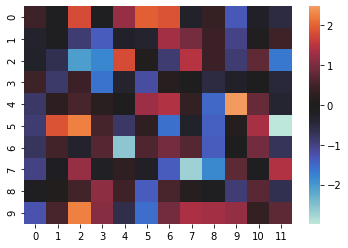

In [114]:
hotel_name = np.random.randn(10,12)
ax=sns.heatmap(hotel_name, center=0)